# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
# Download data
geo_c = pd.read_excel("geo_comment.xlsx")
geo = pd.read_excel("geo.xlsx")
geo_c.head(5)

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [3]:
geo.head(5)


,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [11]:
X = geo[['x', 'y']]
y = geo['comment_class']

# coordinates = geo[['x', 'y']]
# coordinates['x'].head()
# coordinates[ : , 1]

# coordinates.head()

In [5]:
# Classifiers are sensitive to dimensions, therefore we use StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

# check algoritms
algorithms = [
#     AffinityPropagation(),
    KMeans(n_clusters=3),
#     AgglomerativeClustering(n_clusters=3),
    DBSCAN()
]
# full calculation required long time, therefore to cut algoritms

# https://scikit-learn.org/stable/modules/clustering.html
# NOTE: AffinityPropagation - turn off, because this algoritm is not scalable for big N_samples

In [7]:
# сделаем случайное предсказание
clusters_random = np.random.randint(low=0, high=2, size=len(X))

In [8]:
# и функцию-заготовку, которая считает 2 метрики качества и генерирует заголовки для графиков
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [9]:
import warnings
warnings.filterwarnings('ignore')


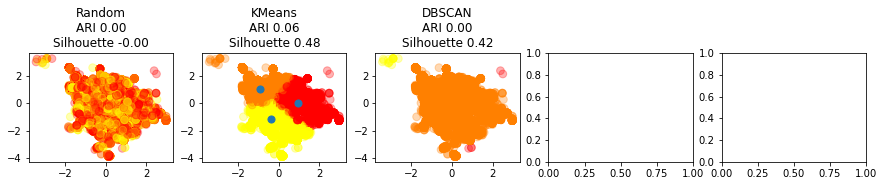

In [18]:
# проследите за ростом ARI и за падением Silhouette (хотя этот показатель по своему назначению тоже должен расти):
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
alpha = 0.3
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_random, cmap='autumn', s=60, alpha=alpha)
axes[0].set_title(get_descr("Random", y, clusters_random, X_scaled))
for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)
    ax.set_title(get_descr(algorithm.__class__.__name__, y, clusters, X_scaled))
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

In [20]:
# аналогично исследовать скопления голосов за и против отдельно
geo_behind = geo.loc[geo['comment_class'] == 1]
geo_against = geo.loc[geo['comment_class'] == -1]
geo_against.head()


,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


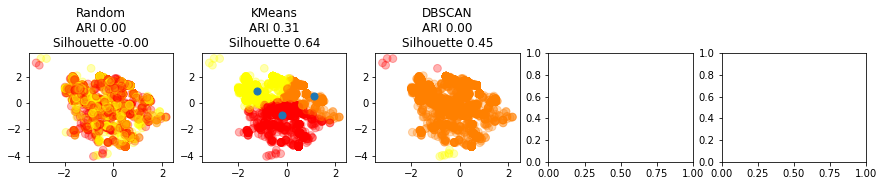

In [23]:
# behind
X = geo_behind[['x', 'y']]
y = geo_behind['y']
X_scaled = scaler.fit_transform(X)

# сделаем случайное предсказание
clusters_random = np.random.randint(low=0, high=2, size=len(X))

# проследите за ростом ARI и за падением Silhouette (хотя этот показатель по своему назначению тоже должен расти):
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
alpha = 0.3
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_random, cmap='autumn', s=60, alpha=alpha)
axes[0].set_title(get_descr("Random", y, clusters_random, X_scaled))
for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)
    ax.set_title(get_descr(algorithm.__class__.__name__, y, clusters, X_scaled))
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

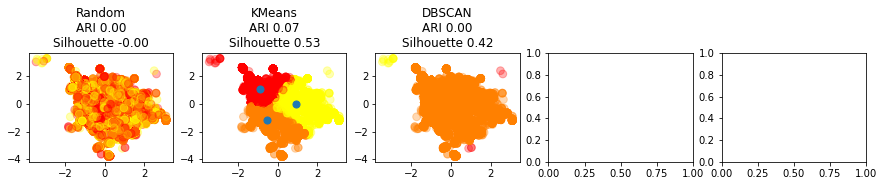

In [24]:
# against
X = geo_against[['x', 'y']]
y = geo_against['y']
X_scaled = scaler.fit_transform(X)

# сделаем случайное предсказание
clusters_random = np.random.randint(low=0, high=2, size=len(X))

# проследите за ростом ARI и за падением Silhouette (хотя этот показатель по своему назначению тоже должен расти):
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
alpha = 0.3
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_random, cmap='autumn', s=60, alpha=alpha)
axes[0].set_title(get_descr("Random", y, clusters_random, X_scaled))
for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)
    ax.set_title(get_descr(algorithm.__class__.__name__, y, clusters, X_scaled))
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)


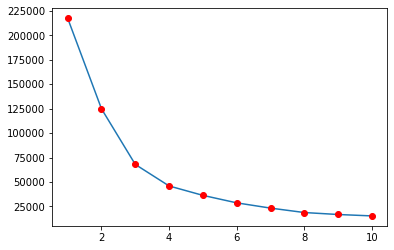

In [25]:
# подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

# let's look at plot to find fracture point 
X = geo[['x', 'y']]
y = geo['y']
X_scaled = scaler.fit_transform(X)

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

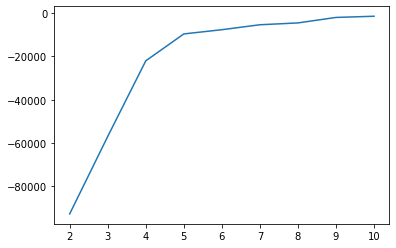

In [26]:
# Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, 
# когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

Optimal amount of clasters is: 3


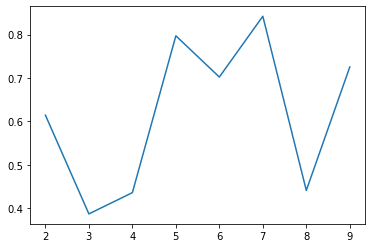

In [30]:
# Теперь можно найти оптимальное число кластеров по этой формуле:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

k_opt = ks[np.argmin(diff_r)+1]
print(F'Optimal amount of clasters is: {k_opt}')
# 

Text(0, 0.5, 'Признак 1')

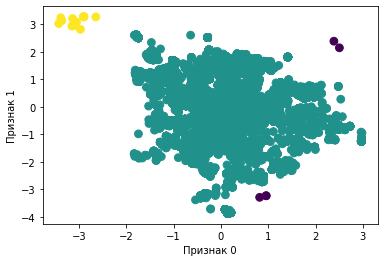

In [61]:
# For check Run the most modern algoritm which self calculate optimal amount of clasters
# This is 3 clasters

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
# import mglearn

# X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# выводим принадлежность к кластерам
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

# NOTE: DBSCAN found the same amount of clusters = 3

In [12]:
# cut geo to rize calculation speed
geo_short = geo.sample(frac = 0.1, replace = True)

# let's look at plot to find fracture point 
X = geo_short[['x', 'y']]
y = geo_short['comment_class']
X_scaled = scaler.fit_transform(X)



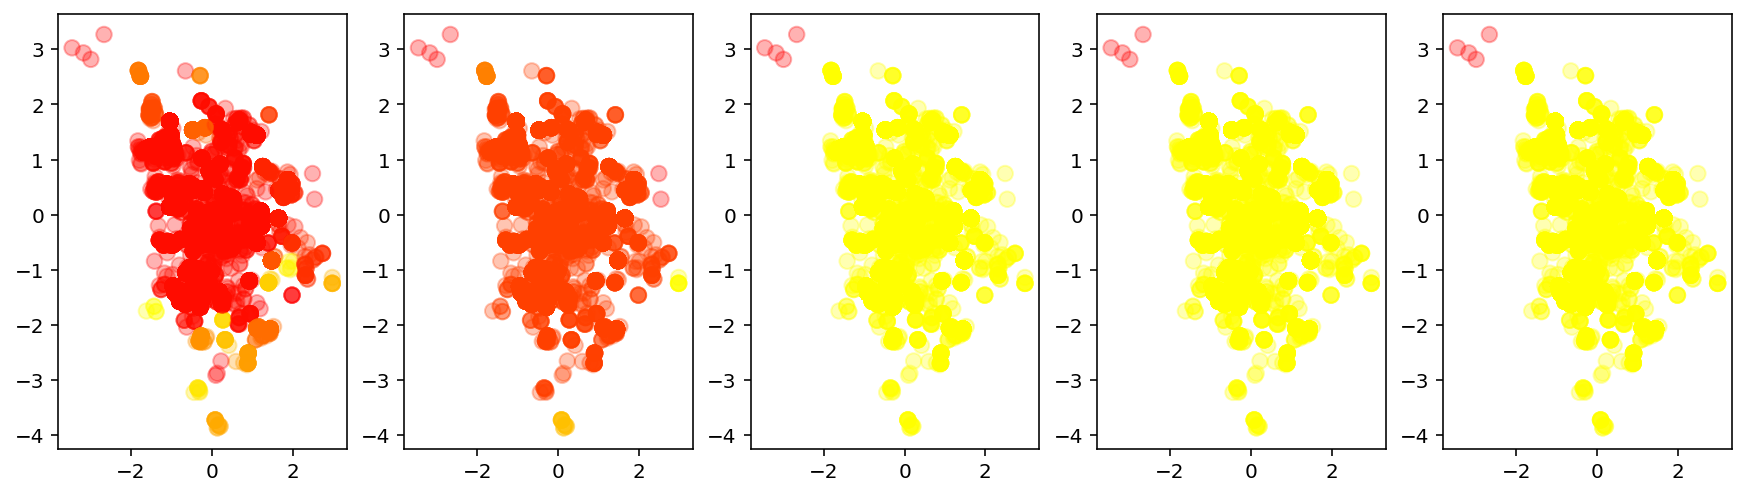

In [13]:
# найти наиболее активные в голосовании районы (подсказка: DBSCAN, 
# не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

# масштабируем данные так, чтобы получить нулевое среднее и единичную дисперсию
scaler = StandardScaler()
scaler.fit(X)

# 
X_scaled = scaler.transform(X)

# set hiperparameters
eps_ = [0.25,0.5, 0.7, 0.9, 1]
# 
min_samples_ = [2]
# , 3, 5, 10

fig, axes = plt.subplots(1, 5, figsize=(15, 4))
alpha = 0.3
      
for ax, e in zip(axes[:], eps_):
    # кластеризуем и выводим картинку
    clusters = DBSCAN(eps=e).fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)

#     So, it doesn't work. Lets change min_samples_ hiperparameter

min_samples = 300. Number of unique clasters: 2
min_samples = 700. Number of unique clasters: 3
min_samples = 1250. Number of unique clasters: 4
min_samples = 2000. Number of unique clasters: 2
min_samples = 5000. Number of unique clasters: 1


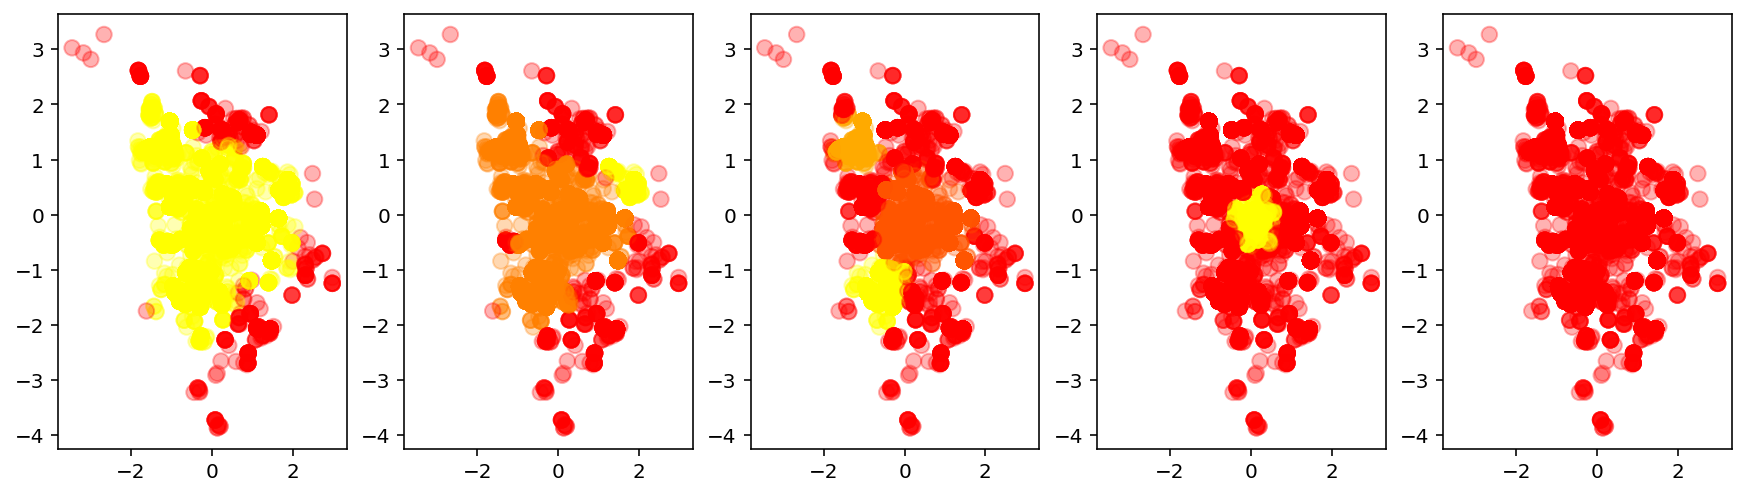

In [30]:
# найти наиболее активные в голосовании районы (подсказка: DBSCAN, 
# не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

# set hiperparameters
# eps_ = [0.25,0.5, 0.7, 0.9, 1]
# 
min_samples_ = [300, 700, 1250,  2000, 5000  ]
#

fig, axes = plt.subplots(1, 5, figsize=(15, 4))
alpha = 0.3
      
for ax, e in zip(axes[:], min_samples_):
    # кластеризуем и выводим картинку
    
    clusters = DBSCAN(min_samples=e).fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)
    labels = DBSCAN(min_samples=e).fit(X_scaled).labels_ 
#     # Number of clusters in labels, ignoring noise if present. 
#     n_clusters_ = len(set(labels_)) - (1 if -1 in labels else 0) 
    print(f'min_samples = {e}. Number of unique clasters: {len(set(labels))}')

# Here we can see , that changing min_samples in DBSCAN we can change unique amount of clusters